<a href="https://colab.research.google.com/github/chinu1997/Capstone-Project2-Team2/blob/main/Chinmaya_Devprasad_team_2_of_Loan_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan.</u></b>

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading The Data**

In [3]:
lending_club_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Aravali/Module 4/capstone prject-2/Copy of lending_club_loans.csv",skiprows=1,low_memory=False)



In [4]:
lending_df=lending_club_df.copy()

In [5]:
lending_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:

lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


# **Data Cleaning**

In [7]:
lending_df.isnull().sum()


id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2629
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
url                                   3
desc                              13296
purpose                               3
title                                16
zip_code                              3
addr_state                            3
dti                                   3


We can see that our loan_status contain 3 nan values so wee need to dropn then first because it will be our target value.

In [8]:
lending_df=lending_df[~lending_df['loan_status'].isna()]

In [9]:
percent_missing = lending_df.isnull().sum() * 100 / len(lending_df)
missing_value_df = pd.DataFrame({'column_name': lending_df.columns,
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values(by='percent_missing',ascending=False)

,column_name,percent_missing
annual_inc_joint,annual_inc_joint,100.000000
mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_rev_tl_op,100.000000
mo_sin_old_il_acct,mo_sin_old_il_acct,100.000000
bc_util,bc_util,100.000000
bc_open_to_buy,bc_open_to_buy,100.000000
avg_cur_bal,avg_cur_bal,100.000000
acc_open_past_24mths,acc_open_past_24mths,100.000000
inq_last_12m,inq_last_12m,100.000000
total_cu_tl,total_cu_tl,100.000000
inq_fi,inq_fi,100.000000


# **Dropping Columns Which Contain morethan 90% of Nan value**

In [11]:
lending_df = lending_df.dropna(thresh=lending_df.shape[0]*0.90,how='all',axis=1)

In [12]:
len(lending_df.columns)

57

# **Exploratory Data Analysis**

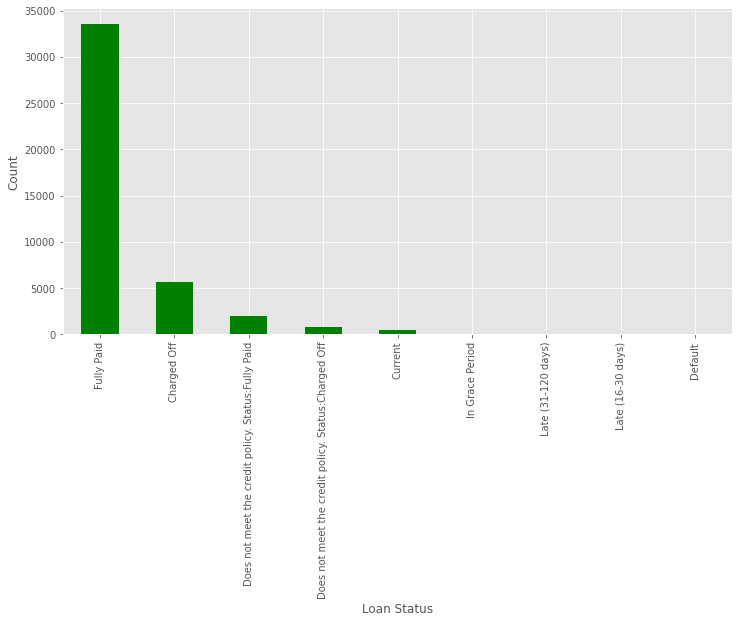

In [13]:
plt.figure(figsize= (12,6))
plt.xlabel('Loan Status')
plt.ylabel('Count')
lending_club_df['loan_status'].value_counts().plot(kind = 'bar', color='green',grid = True)
plt.show()

The loan status has nine different possible values! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with. You can read about most of the different loan statuses

**Fully Paid**->Loan has been fully paid off.

**Charged off**->Loan for which there is no longer a reasonable expectation of further payments.

**Does not meet the credit policy. Status:Fully Paid**--> While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

**Does not meet the credit policy. Status:charged off**->While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.

Current->Loan is up to date on current payments.,

**In Grace period**->The loan is past due but still in the grace period of 15 days.

**Late(30-120)**->Loan hasn't been paid in 31 to 120 days (late on the current payment).

**Late(16-30)**->Loan hasn't been paid in 16 to 30 days (late on the current payment).

**Default**->Loan is defaulted on and no payment has been made for more than 121 days.


In [14]:
test_df=lending_df[lending_df['loan_status']=='Current']


Current status coustemer are treated separately because we don't how they behave so we need to predict thenm by our model.

In [15]:
lending_df=lending_df[lending_df['loan_status']!='Current']

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

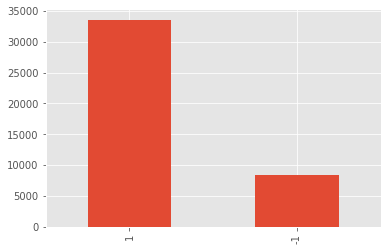

In [16]:
lending_df["Target"] = np.where((lending_df.loan_status == 'Fully Paid'), 1, -1)
lending_df['Target'].value_counts().plot(kind = 'bar', grid = True)

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

In [17]:
lending_df['int_rate'] = lending_df['int_rate'].replace("%","", regex=True).astype(float)
lending_df['term'] = lending_df['term'].replace("months","", regex=True).astype(int)

In [18]:
lending_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

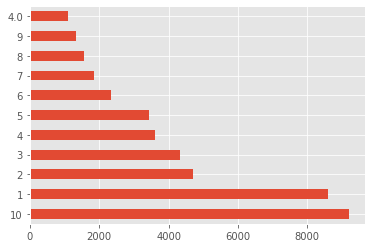

In [31]:
lending_df['emp_length'].fillna(value=lending_df['emp_length'].median(),inplace=True)
lending_df['annual_inc'].fillna(method='ffill',inplace=True)
lending_df['emp_length'].value_counts().plot(kind='barh',grid=True)

I'll be filling the null values with median worked . Also, I'll be using regex to extract the number of years from all of the data.

In [ ]:
lending_df['grade'].value_counts()

B    12240
A    10163
C     8618
D     5909
E     3320
F     1266
G      506
Name: grade, dtype: int64

In [ ]:
lending_df['home_ownership'].value_counts()

RENT        19991
MORTGAGE    18669
OWN          3218
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [39]:
lending_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Target
0,5000.0,5000.0,4975.0,36,10.65,162.87,1,10,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,1
1,2500.0,2500.0,2500.0,60,15.27,59.83,2,1,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,-1


After analyzing the columns, we can conclude that the following features can be removed:

id — randomly generated field by Lending Club for unique identification purposes only.

member_id — also randomly generated field by Lending Club for identification purposes only.

funded_amnt — leaks information from the future(after the loan is already started to be funded).

funded_amnt_inv — also leaks data from the future.

sub_grade — contains redundant information that is already in the grade column (more below).



emp_title — requires other data and a lot of processing to become potentially useful

Dropping unnecessary columns

In [38]:
 lending_df.drop(['member_id','id','sub_grade','emp_title'], axis=1, inplace=True)

In [40]:
lending_df.iloc[0:,0:14].isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
dtype: int64

Label Encoding for grade column

In [25]:
label_encode=LabelEncoder()
lending_df['grade']= label_encode.fit_transform(lending_df['grade']) 
  

In [30]:
lending_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
lending_df['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007'],
      dtype=object)

In [ ]:
lending_df['issue_d']= pd.to_datetime(lending_df['issue_d']).apply(lambda x: int(x.strftime('%Y')))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


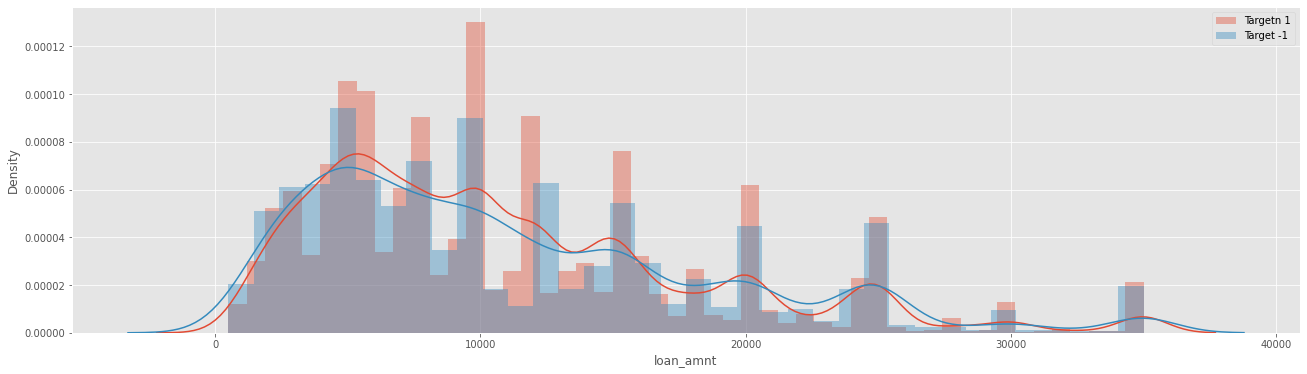

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


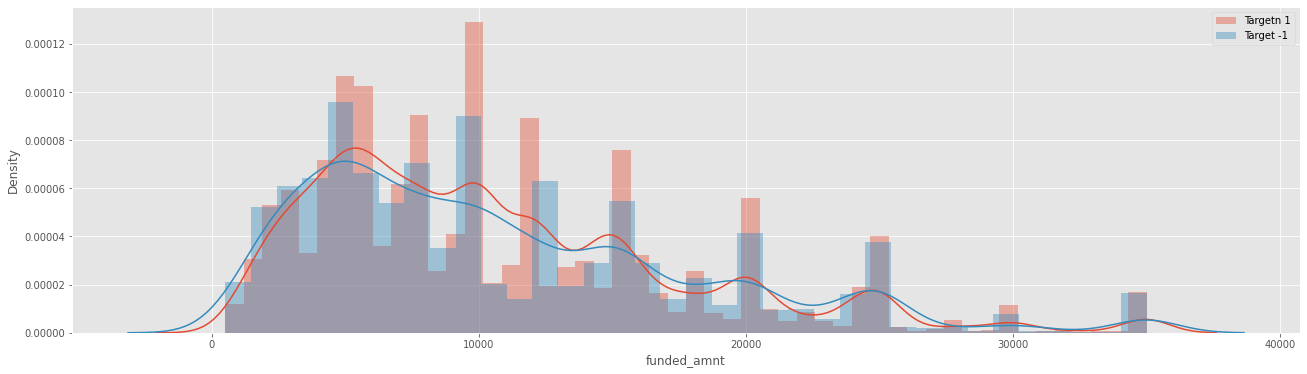

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


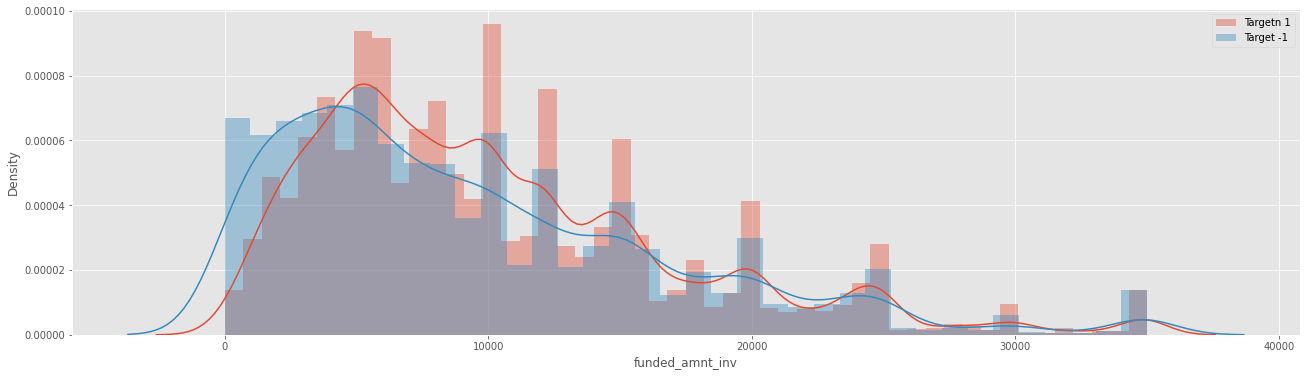

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


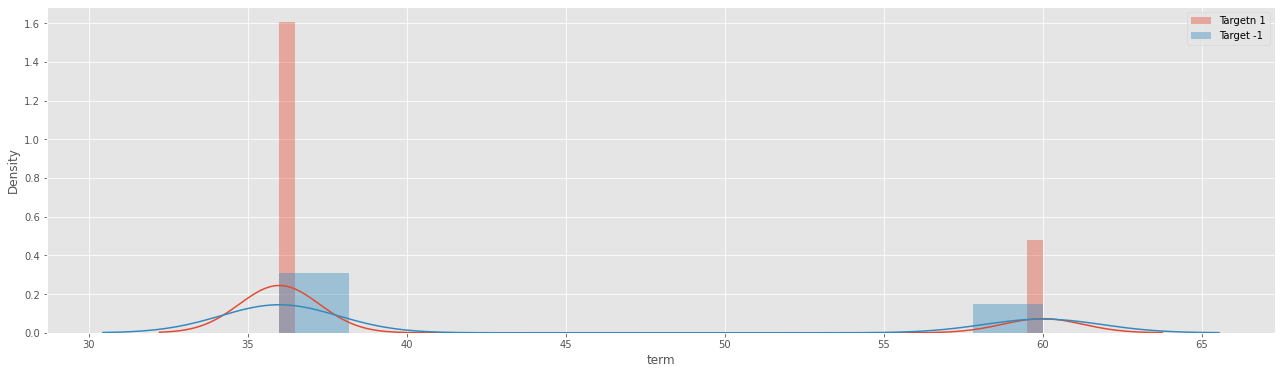

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


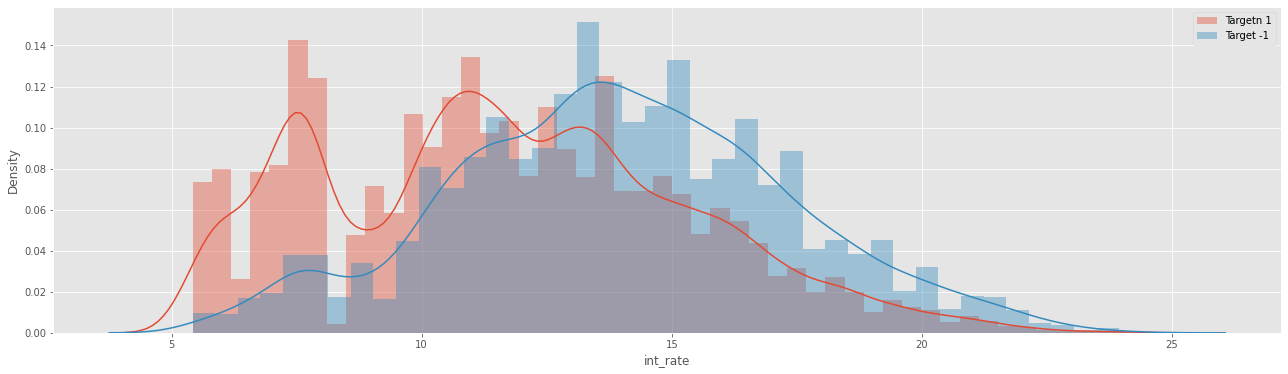

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


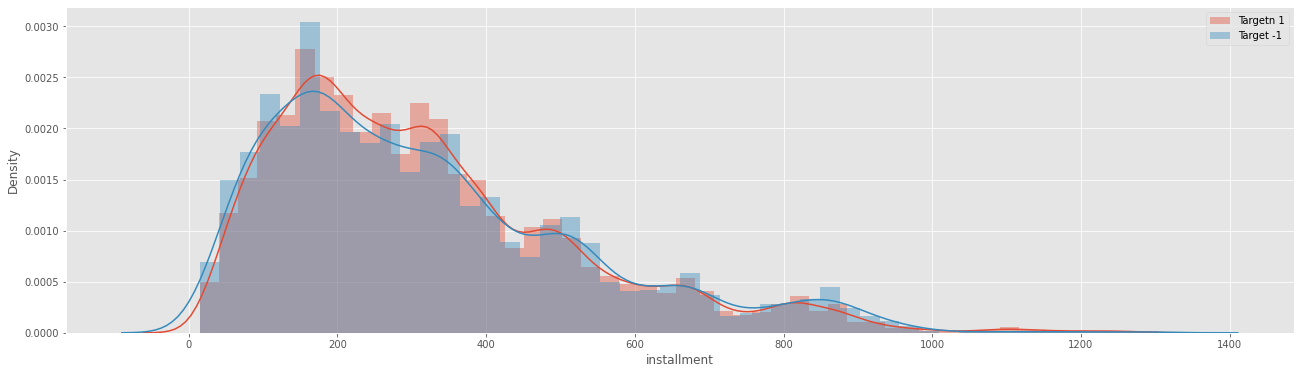

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


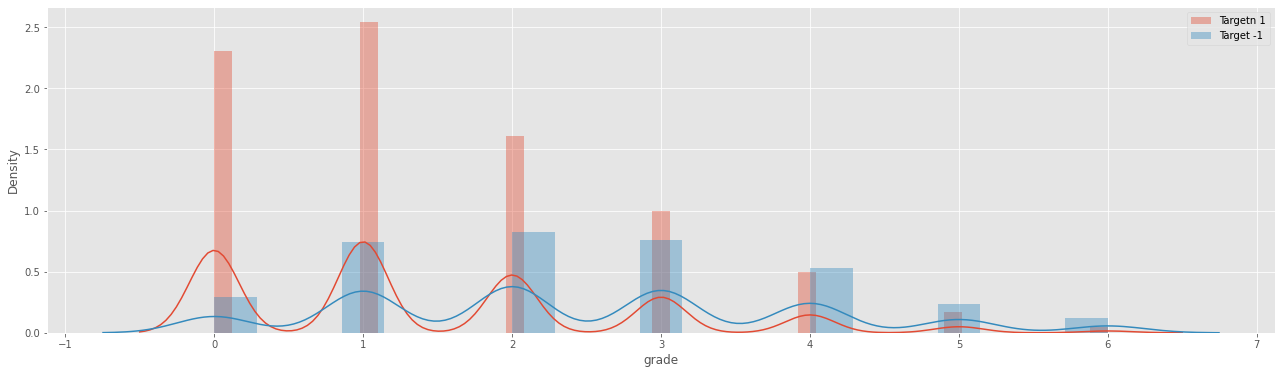

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


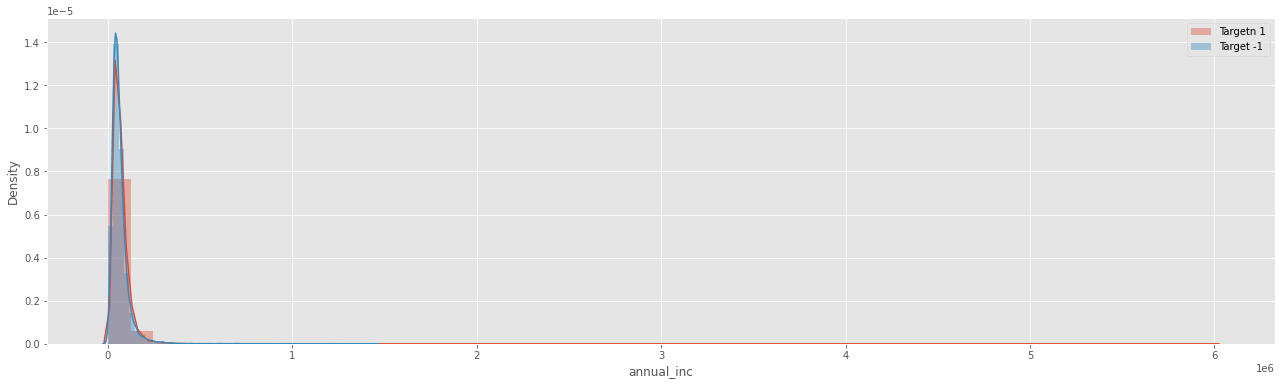

In [41]:
for col in lending_df.iloc[0:,0:14].describe().columns:
  fig = plt.figure(figsize=(22,6))
  sns.distplot(lending_df.loc[lending_df['Target'] == 1, col],label='Targetn 1')
  sns.distplot(lending_df.loc[lending_df['Target'] == -1, col],label='Target -1')
  plt.legend()
  plt.show()

The density of interest rates follow kind of a Normal distribution with more density on interest rates between 12%-18%.

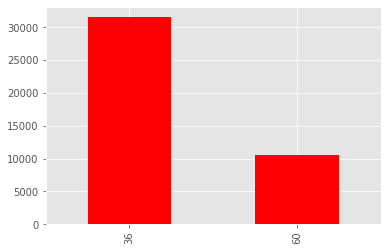

In [44]:
lending_df['term'].value_counts().plot(kind='bar',color='red',grid=True)

In [58]:
Q1 = lending_df['annual_inc'].quantile(0.25)
Q3 = lending_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lending_df = lending_df[~((lending_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(lending_df['annual_inc'] > (Q3 + 1.5 * IQR)))]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


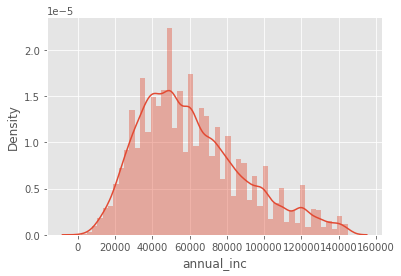

In [57]:
sns.distplot(df['annual_inc'])

In [60]:
lending_df.shape

(40010, 54)

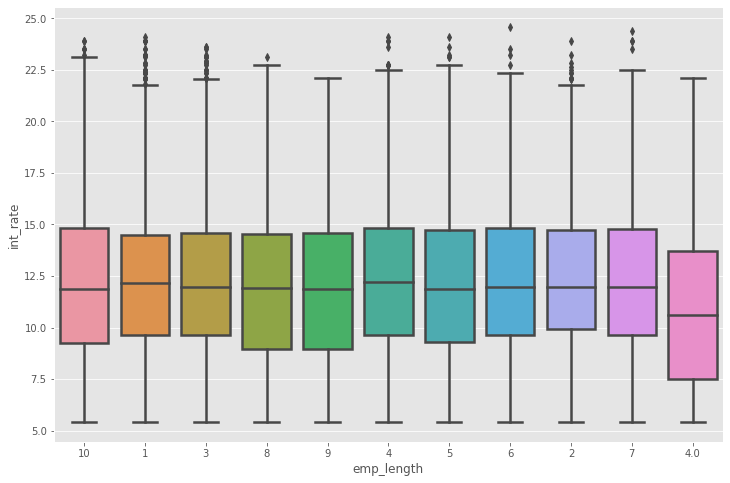

In [45]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=lending_df, linewidth=2.5)

plt.show()